# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of? <br />
A: The shape of $\boldsymbol{a}^T\boldsymbol{x}$, where $\boldsymbol{a}$ and $\boldsymbol{b}$ are both size [n,1], is [1,1].

What is the *shape* of the thing we are taking the derivative with respect to? <br />
A: [n,1]

What is the *shape* of the result of the expression? <br />
A: [1,n], a row vector $\boldsymbol{a}^T$

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$ <\ br>
A:

$$
f(\boldsymbol{x}) = \boldsymbol{a}^T\boldsymbol{x} = \sum_{i=1}^n a_i x_i,\qquad \frac{\partial}{\partial x_j}(\boldsymbol{a}^T\boldsymbol{x}) = a_j.
$$

Collecting all partials gives the row vector [1] $([a_1,\dots,a_n]=\boldsymbol{a}^T)$.

Intuitively I think of it like this:
$$
\frac{\boldsymbol{a}^T \partial(\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$ <\ br>
$$
\boldsymbol{a}^T\boldsymbol{I} = \boldsymbol{a}^T
$$ <\ br>

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$ <\ br>
A: 
$$
\boldsymbol{a}^T \boldsymbol{A} \boldsymbol{a}=\sum_{i,j} a_i A_{ij} a_j,\qquad
\frac{\partial}{\partial a_k}(\boldsymbol{a}^T \boldsymbol{A} \boldsymbol{a}) = \sum_j A_{kj} a_j + \sum_i a_i A_{ik} = ( \boldsymbol{A}\boldsymbol{a})_k + (\boldsymbol{A}^T \boldsymbol{a})_k. 
$$ [2]
Collecting all partials yields the row vector [1]
$$
(\boldsymbol{A}\boldsymbol{a}+\boldsymbol{A}^T \boldsymbol{a})^T = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T).
$$

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

A: This method works because we minimize the loss of the function which is concave-up and differentiable due to the squaring operation. The minimum will have a derivative of zero.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

A: If X is invertible, then $$\boldsymbol{X}\boldsymbol{\theta} = \boldsymbol{y}$$ becomes $$\boldsymbol{\theta} = \mathbf{X}^{-1} \boldsymbol{y}$$

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$
A:

Since [1] (5.108)
$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{W}\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{W}\boldsymbol{A}
$$

Then we can cancel the $$\boldsymbol{W}$$ from both sides and get 

$$
-2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A}
$$

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

$$ \vert\vert\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta}\vert\vert^2 = (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta})^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta}), $$

we take the derivative with respect to $\boldsymbol{\theta}$, set it to zero, and solve:

Using [1] 5.5 and Equation 5.108

$$ \frac{\partial}{\partial \boldsymbol{\theta}} (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta})^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta}) = -2(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta})^T \boldsymbol{X} = 0 $$

This gives

$$ (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta})^T \boldsymbol{X} = 0 
$$

$$
 \boldsymbol{y}^T \boldsymbol{X} = \boldsymbol{\theta}^T \boldsymbol{X}^T \boldsymbol{X} $$

Transpose both sides:

$$ \boldsymbol{X}^T \boldsymbol{y} = \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\theta} $$

If $\boldsymbol{X}^T \boldsymbol{X}$ is invertible, solve for $\boldsymbol{\theta}$:

$$ \boldsymbol{\hat{\theta}_{OLS}} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y} $$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [44]:
import numpy as np

In [45]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [46]:
X = np.zeros((n, 3))
X[:, 0] = 1
X[:, 1] = income
X[:, 2] = children

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

$$ \boldsymbol{\hat{\theta}_{OLS}} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y} $$

In [47]:
def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

beta = OLS_parameters(X, spending)
print(f'beta = {beta}')

beta = [ 9.12808583  0.5119025  14.60743095]


## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [65]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [66]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    for i in range(p + 1):
        X[:, i] = x**i
    return X

X = polynomial_features(x, 5)

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [67]:
beta = OLS_parameters(X, y)

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

Poly model MSE on test set : 0.016393199898149025


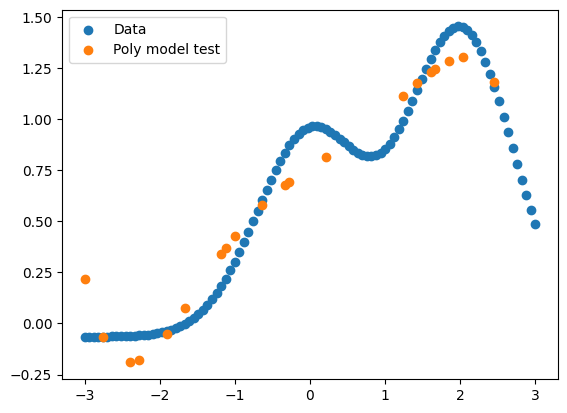

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# instead use beta = OLS_parameters(X, y) to do the prediction

beta = OLS_parameters(X_train, y_train)
poly_predict_test = X_test @ beta

poly_mse_test = mean_squared_error(y_test, poly_predict_test)

print(f"Poly model MSE on test set : {poly_mse_test}")

plt.scatter(x, y, label = "Data")
plt.scatter(X_test[:, 1], poly_predict_test, label = "Poly model test")

plt.legend()
plt.show()

**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

Poly model MSE on test set (degree 2): 0.05029359968472671
Poly model MSE on train set (degree 2): 0.0439728933364256
Poly model MSE on test set (degree 3): 0.027271064193137386
Poly model MSE on train set (degree 3): 0.020460419250535065
Poly model MSE on test set (degree 4): 0.025787245193635688
Poly model MSE on train set (degree 4): 0.02021830070919616
Poly model MSE on test set (degree 5): 0.01735286406630761
Poly model MSE on train set (degree 5): 0.012975121320803732
Poly model MSE on test set (degree 6): 0.014982733862288808
Poly model MSE on train set (degree 6): 0.007957998205299265
Poly model MSE on test set (degree 7): 0.00916255176718774
Poly model MSE on train set (degree 7): 0.005098648820975294
Poly model MSE on test set (degree 8): 0.001027485345419399
Poly model MSE on train set (degree 8): 0.0010768713513831729
Poly model MSE on test set (degree 9): 0.0011203706565752912
Poly model MSE on train set (degree 9): 0.0009832039725482424
Poly model MSE on test set (degree 

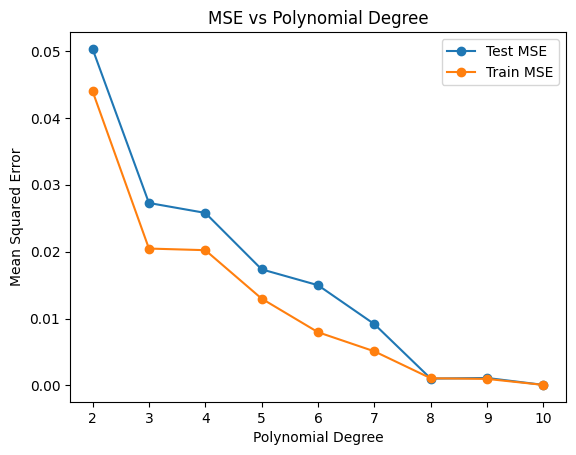

In [96]:
degrees = list(range(2, 11))
mse_test_values = []
mse_train_values = []

for degree in degrees:
    X = polynomial_features(x, degree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    beta = OLS_parameters(X_train, y_train)
    poly_predict_test = X_test @ beta
    poly_predict_train = X_train @ beta

    poly_mse_test = mean_squared_error(y_test, poly_predict_test)
    poly_mse_train = mean_squared_error(y_train, poly_predict_train)

    print(f"Poly model MSE on test set (degree {degree}): {poly_mse_test}")
    print(f"Poly model MSE on train set (degree {degree}): {poly_mse_train}")
    mse_test_values.append(poly_mse_test)
    mse_train_values.append(poly_mse_train)

# plot all the MSE values against the degree
plt.plot(degrees, mse_test_values, marker='o', label='Test MSE')
plt.plot(degrees, mse_train_values, marker='o', label='Train MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.legend()
plt.show()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

The plot shows how the model's performance changes as we increase the polynomial degree. As the degree increases, the training MSE generally decreases, since the model gains more variance and can fit the training data better. Here we test polynomial degrees from 2 to 10. The trend is for the test MSE to decrease together with the training MSE. We want a model that keeps both errors low, indicating good generalization to the underlying data distribution. This tells me that we have not yet overfit the model at 10 polynomial degrees.

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [85]:
from sklearn.preprocessing import PolynomialFeatures

n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

X = polynomial_features(x, 5)
X_sci = PolynomialFeatures(degree=5, include_bias=True).fit_transform(x.reshape(-1, 1))

assert np.allclose(X, X_sci)
print("OK")

OK


**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression
model_sci = LinearRegression(fit_intercept=False)
model_sci.fit(X, y)

my_model = OLS_parameters(X, y)

assert np.allclose(model_sci.coef_, my_model)
print("OK")

AssertionError: 

## References

[1] M. P. Deisenroth, A. A. Faisal, and C. S. Ong, *Mathematics for Machine Learning*. Cambridge University Press, 2020.  

[2] OpenAI, *ChatGPT* (Aug 28 version). Available: https://chat.openai.com/, 2025.

[3] Hastie et al (https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf)